# 测试 AE， AAE， Supervised-AAE的恢复能力

In [1]:
from autoencoder_torch import Encoder as Encoder_AE
from autoencoder_torch import Decoder as Decoder_AE
from supervised_adversarial_autoencoder_torch import Encoder as Encoder_SAAE
from supervised_adversarial_autoencoder_torch import Decoder as Decoder_SAAE
from supervised_adversarial_autoencoder_torch import Discriminator as Dis_SAAE
from adversarial_autoencoder_torch import Encoder as Encoder_AAE
from adversarial_autoencoder_torch import Decoder as Decoder_AAE
from adversarial_autoencoder_torch import Discriminator as Dis_AAE

from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch
from torch.nn.functional import one_hot

import matplotlib.pyplot as plt

In [2]:
# dataloader # 

transform = transforms.Compose(
    [transforms.ToTensor(), ])

train_data = MNIST(root='./data', train=True, download=False, transform=transform)
# 如果没有下载，使用download=True, 下载一次后，后面再运行代码无需下载
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128,
                                           shuffle=True, num_workers=2)
test_data = MNIST(root='./data', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128,
                                          shuffle=False, num_workers=2)

In [3]:
# load saved models
cp_encoder_AE = torch.load('../TorchResults/Autoencoder/20211029_z2_lr0.001_Autoencoder/Saved_models/encoder_1000.pth')
cp_decoder_AE = torch.load('../TorchResults/Autoencoder/20211029_z2_lr0.001_Autoencoder/Saved_models/decoder_1000.pth')

cp_encoder_AAE = torch.load('../TorchResults/Adversarial_Autoencoder/20211029_z2_lr0.001_Adversarial_Autoencoder/Saved_models/encoder_1000.pth')
cp_decoder_AAE = torch.load('../TorchResults/Adversarial_Autoencoder/20211029_z2_lr0.001_Adversarial_Autoencoder/Saved_models/decoder_1000.pth')
cp_dis_AAE = torch.load('../TorchResults/Adversarial_Autoencoder/20211029_z2_lr0.001_Adversarial_Autoencoder/Saved_models/discriminator_1000.pth')

cp_encoder_SAAE = torch.load('../TorchResults/supervised_Adversarial_Autoencoder/20211029_2_0.001_supervised_Adversarial_Autoencoder/Saved_models/encoder_1000.pth')
cp_decoder_SAAE = torch.load('../TorchResults/supervised_Adversarial_Autoencoder/20211029_2_0.001_supervised_Adversarial_Autoencoder/Saved_models/decoder_1000.pth')
cp_dis_SAAE = torch.load('../TorchResults/supervised_Adversarial_Autoencoder/20211029_2_0.001_supervised_Adversarial_Autoencoder/Saved_models/discriminator_1000.pth')

In [4]:
EncoderAE = Encoder_AE(2)
EncoderAE.load_state_dict(cp_encoder_AE['encoder'])

DecoderAE = Decoder_AE(2)
DecoderAE.load_state_dict(cp_decoder_AE['decoder'])

EncoderAAE = Encoder_AAE(2)
EncoderAAE.load_state_dict(cp_encoder_AAE['encoder'])

DecoderAAE = Decoder_AAE(2)
DecoderAAE .load_state_dict(cp_decoder_AAE['decoder'])

DisAAE = Dis_AAE(2)
DisAAE.load_state_dict(cp_dis_AAE['discriminator'])

EncoderSAAE = Encoder_SAAE(2)
EncoderSAAE.load_state_dict(cp_encoder_SAAE['encoder'])

DecoderSAAE = Decoder_SAAE(12)
DecoderSAAE.load_state_dict(cp_decoder_SAAE['decoder'])

DisSAAE = Dis_SAAE(2)
DisSAAE.load_state_dict(cp_dis_SAAE['discriminator'])

<All keys matched successfully>

# 1 测试恢复能力
x > encoder > decoder > x_hat

In [5]:
image, label = next(iter(test_loader))

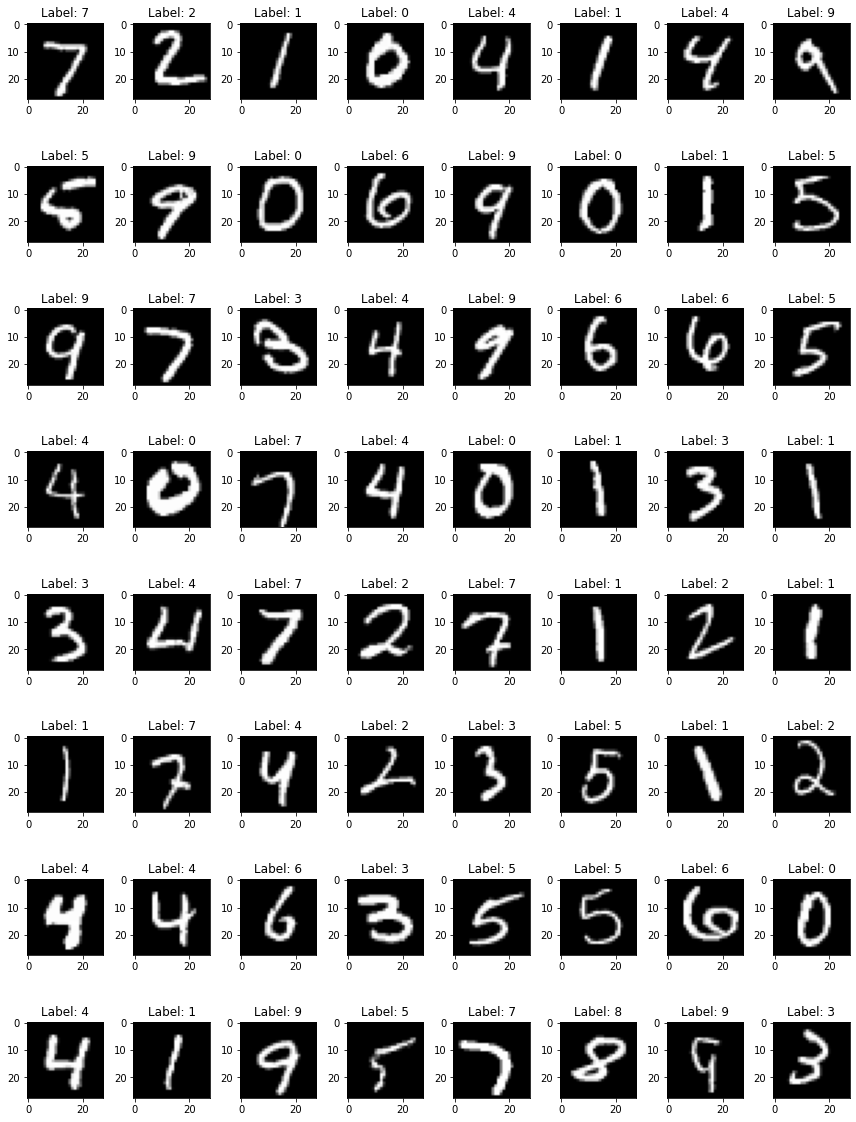

In [6]:
# 展示部分 image and label
image_show = image.numpy().squeeze()
num_row = 8
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(64):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(image_show[i], cmap='gray')
    ax.set_title('Label: {}'.format(label[i]))
plt.tight_layout()
plt.show()

In [7]:
AE_x_hat = DecoderAE(EncoderAE(image))
AE_x_hat = AE_x_hat.detach().numpy().squeeze()

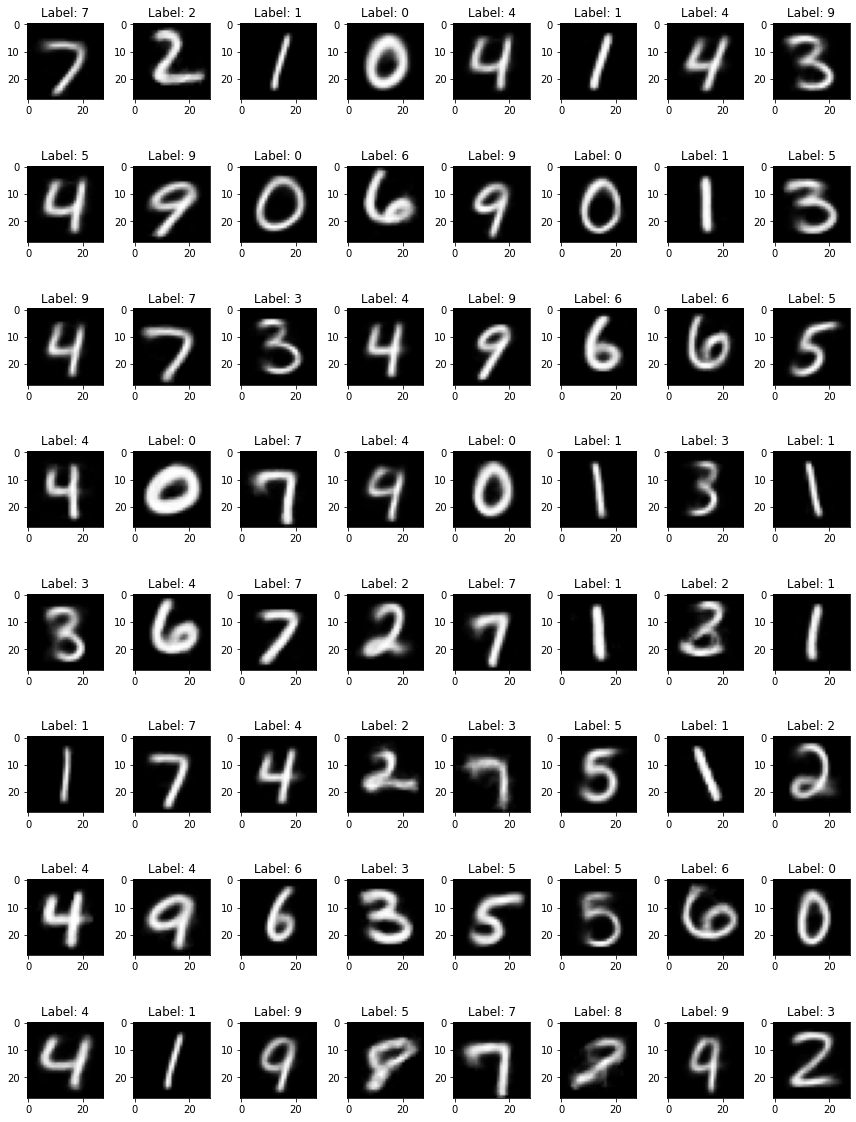

In [8]:
# 展示结果
num_row = 8
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(64):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(AE_x_hat[i], cmap='gray')
    ax.set_title('Label: {}'.format(label[i]))
plt.tight_layout()
plt.show()

In [9]:
AAE_x_hat = DecoderAAE(EncoderAAE(image))
AAE_x_hat = AAE_x_hat.detach().numpy().squeeze()

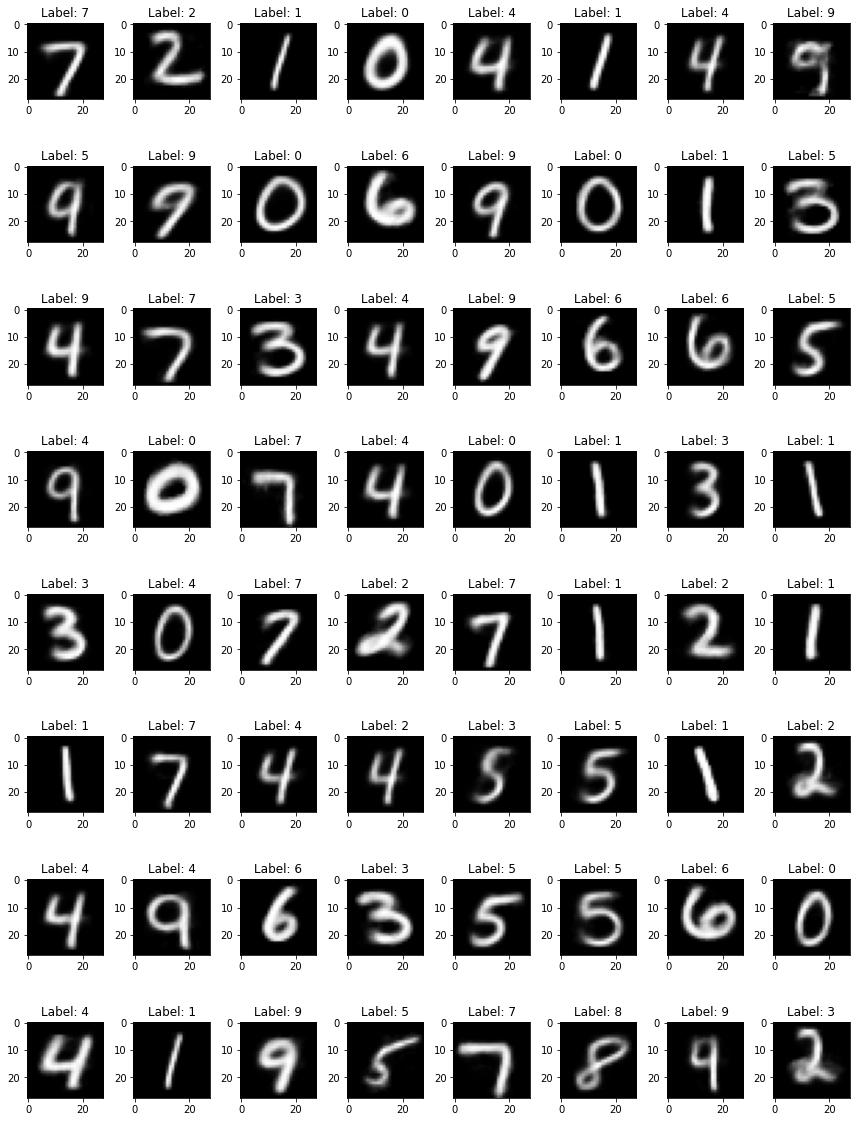

In [10]:
num_row = 8
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(64):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(AAE_x_hat[i], cmap='gray')
    ax.set_title('Label: {}'.format(label[i]))
plt.tight_layout()
plt.show()

In [12]:
lab_onehot = one_hot(label, num_classes=10)
z_ = EncoderSAAE(image)
Z = torch.cat((lab_onehot, z_), dim=1)
SAAE_x_hat = DecoderSAAE(Z)
SAAE_x_hat = SAAE_x_hat.detach().numpy().squeeze()

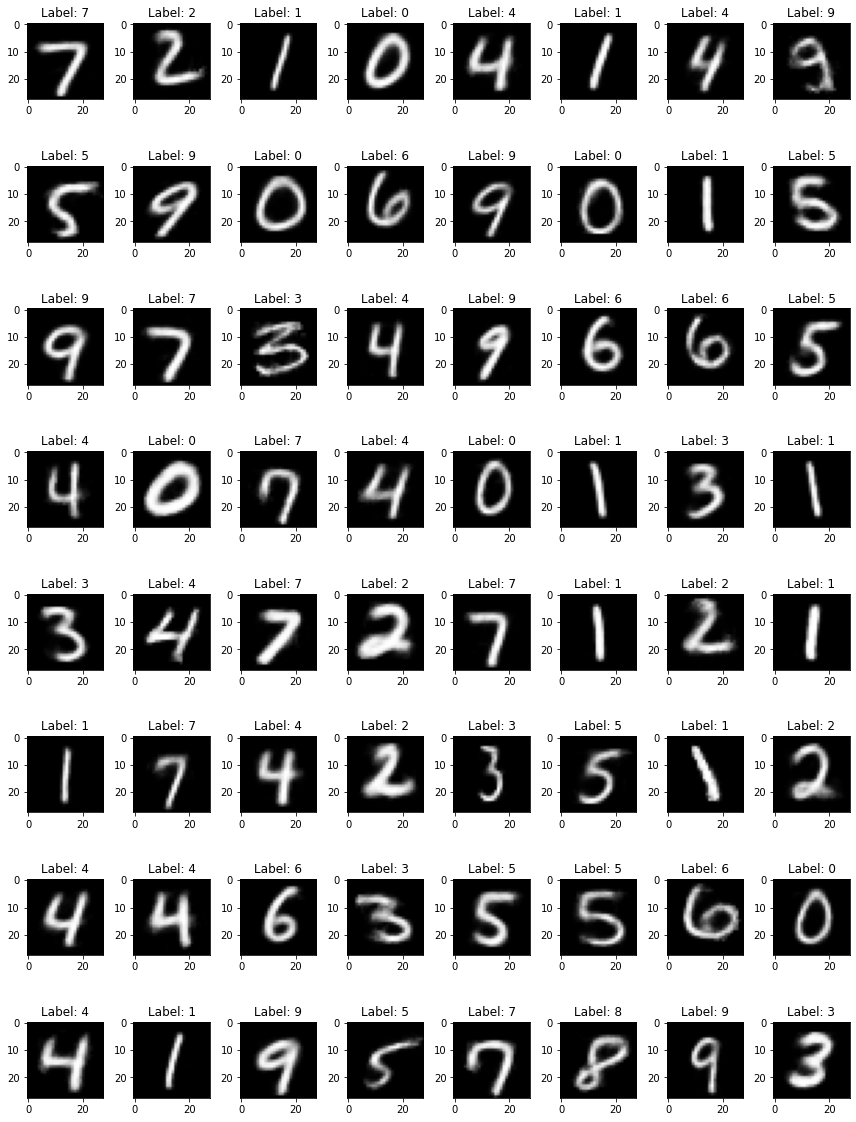

In [13]:
num_row = 8
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(64):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(SAAE_x_hat[i], cmap='gray')
    ax.set_title('Label: {}'.format(label[i]))
plt.tight_layout()
plt.show()

## 总结
三种方法的恢复效果差不多

# 2 测试 从高斯分布中重建数据的能力

z_guass > decoder > x_recon

In [37]:
z_guass = torch.randn(128, 2)

In [38]:
AE_x_recon = DecoderAE(z_guass)
AE_x_recon = AE_x_recon.detach().numpy().squeeze()

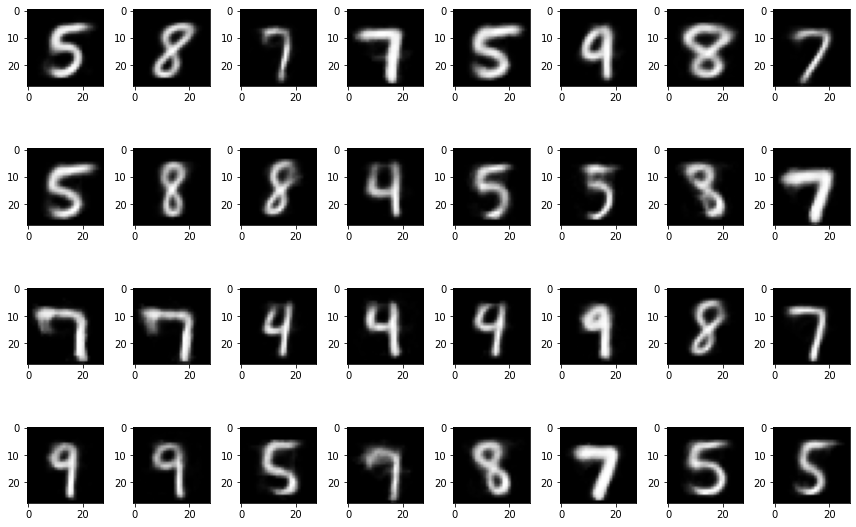

In [45]:
# 展示结果
num_row = 4
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(32):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(AE_x_recon[i], cmap='gray')
plt.tight_layout()
plt.show()

In [46]:
AAE_x_recon = DecoderAAE(z_guass)
AAE_x_recon = AAE_x_recon.detach().numpy().squeeze()

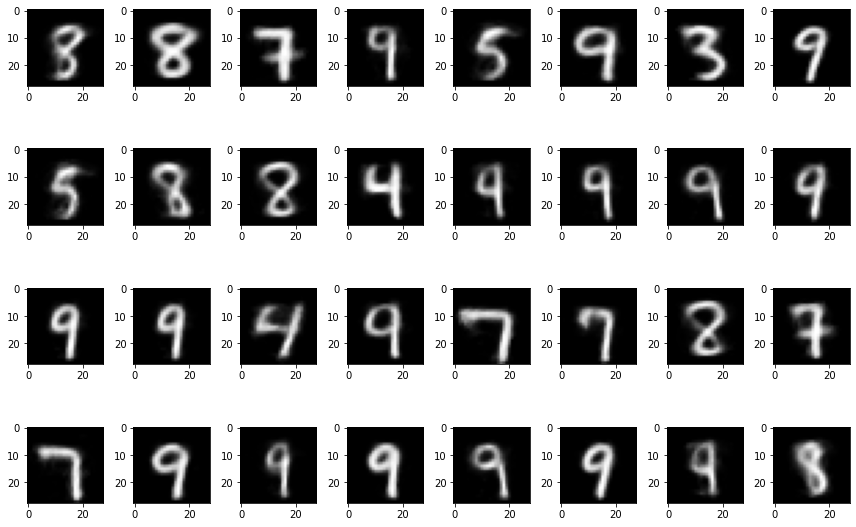

In [47]:
# 展示结果
num_row = 4
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(32):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(AAE_x_recon[i], cmap='gray')
plt.tight_layout()
plt.show()

In [50]:
lab_onehot = one_hot(label, num_classes=10)
Z = torch.cat((lab_onehot, z_guass), dim=1)
SAAE_x_recon = DecoderSAAE(Z)
SAAE_x_recon = SAAE_x_recon.detach().numpy().squeeze()

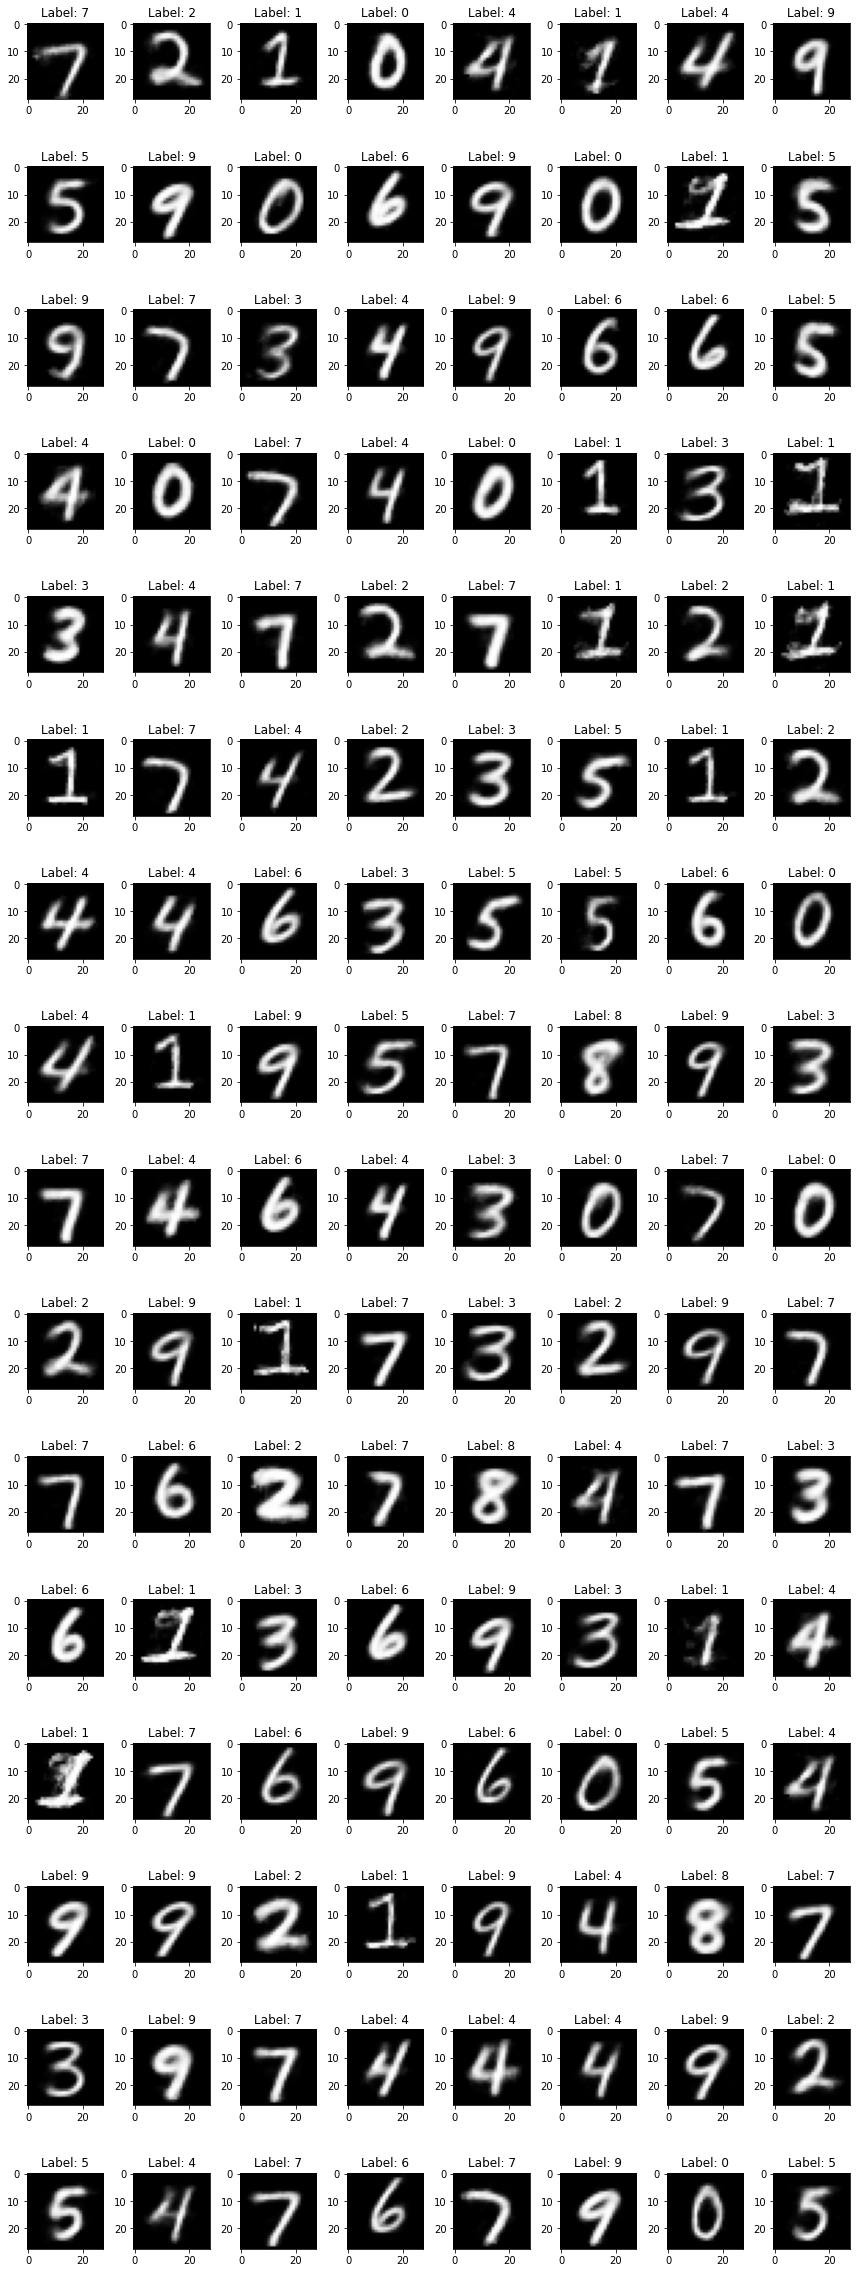

In [54]:
# 展示结果
num_row = 16
num_col = 8  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(128):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(SAAE_x_recon[i], cmap='gray')
    ax.set_title('Label: {}'.format(label[i]))
plt.tight_layout()
plt.show()